<div align="left">
<img align="left" src="../misc/site-logo.png" >
<div> <b> 2018 Data Science Bowl </b> </div>
<div> Pedro D. Marrero Fernandez</div>
<div> https://www.kaggle.com/c/data-science-bowl-2018/discussion/47770 </div>
<div> :), :(, :/</div>
</div>            

In [1]:
import os
import sys
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import csv
from skimage import color
import scipy.misc
import cv2


sys.path.append('../')
from torchlib.datasets.dsxbdata import DSXBExDataset, DSXBDataset
from torchlib.datasets import imageutl as imutl

from pytvision.transforms import transforms as mtrans
from pytvision import visualization as view

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [2]:
pathdataset      = os.path.expanduser( '~/.datasets' )
pathdataset      = os.path.join( pathdataset, 'datasciencebowl' )
namedataset      = 'databoewlex'
sub_folder       = 'train'
folders_images   = 'images'
folders_labels   = 'labels'
folders_contours = 'contours'
folders_weights  = 'weights'

pathname = os.path.join(pathdataset, namedataset);
dataloader = imutl.dsxbExProvide(
    pathname, 
    sub_folder, 
    folders_images, 
    folders_labels,
    folders_contours,
    folders_weights,
    'png'
    )

print(len(dataloader))
print(':)!!!')


2610
:)!!!


2545
0 255 (250, 250, 3)
0 255 (250, 250)
0 255 (250, 250)
0.424 14.062 (250, 250)


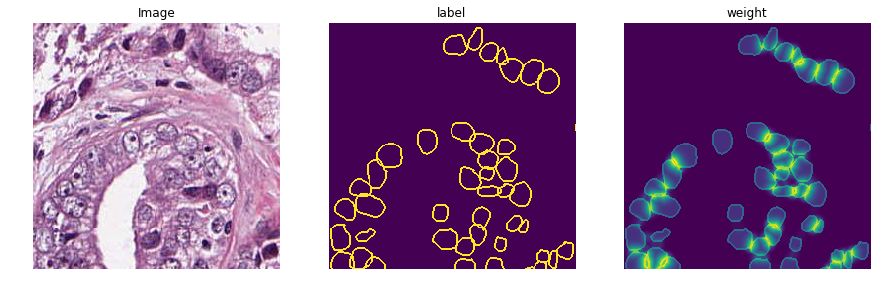

In [3]:
def summary( data ):
    print(np.min(data), np.max(data), data.shape  )

i = np.random.randint( len(dataloader) )
image, label, contours, weight = dataloader[i]

print(i)
summary(image)
summary(label)
summary(contours)
summary(weight)

plt.figure( figsize=(15,15) )
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Image')
plt.axis('off')
plt.subplot(132)
plt.imshow(contours)
plt.title('label')
plt.axis('off')
plt.subplot(133)
plt.imshow(weight)
plt.title('weight')
plt.axis('off')

plt.show()


In [4]:
## estadisticas ....

# DATA LOADER 

0 torch.Size([4, 3, 572, 572]) torch.Size([4, 3, 572, 572]) torch.Size([4, 1, 572, 572])
tensor(0.) tensor(0.9255) torch.Size([572, 572])
tensor(0.) tensor(1.) torch.Size([572, 572])
tensor(0.) tensor(43.1520) torch.Size([572, 572])


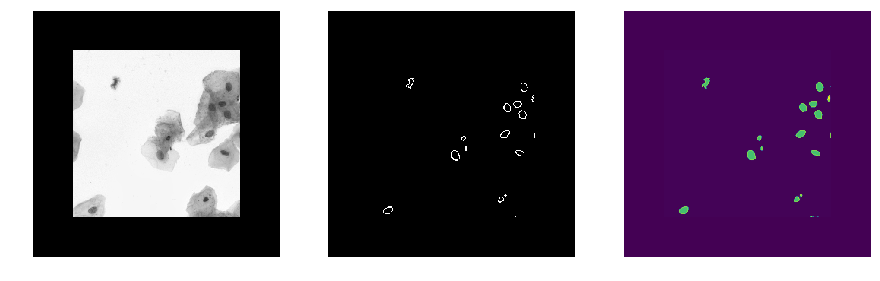

In [7]:

pathdataset      = os.path.expanduser( '~/.datasets' )
pathdataset      = os.path.join( pathdataset, 'datasciencebowl' )
namedataset      = 'databoewlex'
sub_folder       = 'train'
folders_images   = 'images'
folders_labels   = 'labels'
folders_contours = 'contours'
folders_weights  = 'weights'
size_input       = 388

base_folder = os.path.join(pathdataset, namedataset) 

data = DSXBDataset(
        base_folder, 
        sub_folder, 
        transform=transforms.Compose([ 
              mtrans.ToResizeUNetFoV(size_input, cv2.BORDER_CONSTANT),                                        
              mtrans.ToTensor(),
              mtrans.ToNormalization(),        
        
            ])
        )

dataloader = DataLoader(data, batch_size=4, shuffle=False, num_workers=1 )

label_batched = []
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['label'].size(),
          sample_batched['weight'].size()    
         )
    
    image = sample_batched['image'][0,0,...]
    label = sample_batched['label'][0,2,...]
    weight = sample_batched['weight'][0,0,...]
    
    print(torch.min(image), torch.max(image), image.shape )
    print(torch.min(label), torch.max(label), image.shape )
    print(torch.min(weight), torch.max(weight), image.shape )

    # observe 4th batch and stop.
    if i_batch == 0: 
        
        plt.figure( figsize=(15,15) )
        plt.subplot(131)
        plt.imshow(image,cmap='gray')
        plt.axis('off')
        plt.ioff()
        
        plt.subplot(132)
        plt.imshow(label,cmap='gray')
        plt.axis('off')
        plt.ioff()
        
        plt.subplot(133)
        plt.imshow(weight)
        plt.axis('off')
        plt.ioff()
        
        
        plt.show()        
        
        
        break

# DATA AUMENTATION

0 torch.Size([4, 3, 572, 572]) torch.Size([4, 3, 572, 572]) torch.Size([4, 1, 572, 572])
tensor(0.) tensor(0.8978) torch.Size([572, 572])
tensor(0.) tensor(1.) torch.Size([572, 572])
tensor(0.) tensor(13.3880) torch.Size([572, 572])


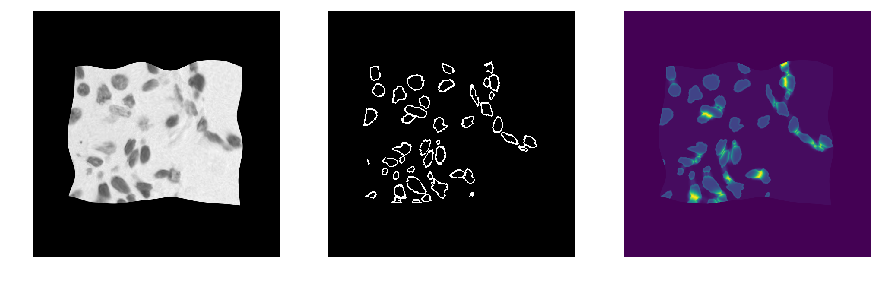

1 torch.Size([4, 3, 572, 572]) torch.Size([4, 3, 572, 572]) torch.Size([4, 1, 572, 572])
tensor(0.) tensor(0.3176) torch.Size([572, 572])
tensor(0.) tensor(1.) torch.Size([572, 572])
tensor(0.) tensor(19.9146) torch.Size([572, 572])


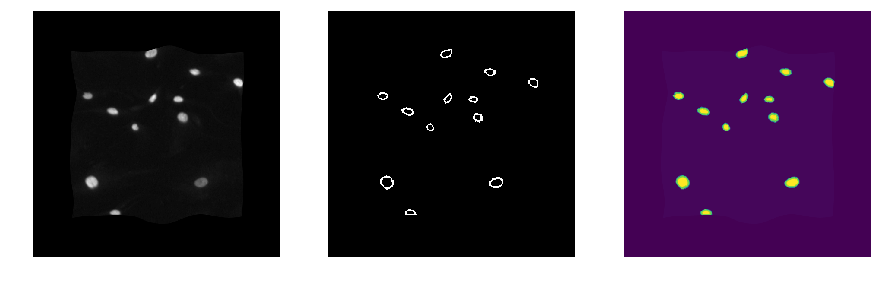

2 torch.Size([4, 3, 572, 572]) torch.Size([4, 3, 572, 572]) torch.Size([4, 1, 572, 572])
tensor(0.) tensor(0.5486) torch.Size([572, 572])
tensor(0.) tensor(1.) torch.Size([572, 572])
tensor(0.) tensor(13.6950) torch.Size([572, 572])


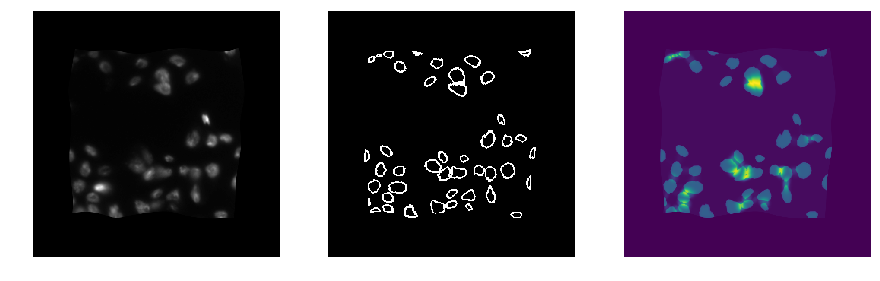

3 torch.Size([4, 3, 572, 572]) torch.Size([4, 3, 572, 572]) torch.Size([4, 1, 572, 572])
tensor(0.) tensor(0.9713) torch.Size([572, 572])
tensor(0.) tensor(1.) torch.Size([572, 572])
tensor(0.) tensor(58.0069) torch.Size([572, 572])


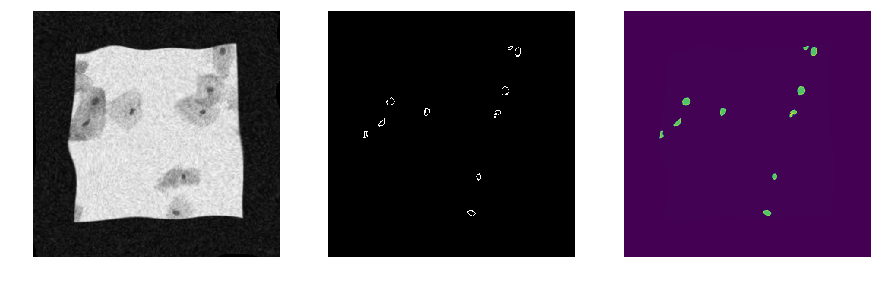

4 torch.Size([4, 3, 572, 572]) torch.Size([4, 3, 572, 572]) torch.Size([4, 1, 572, 572])
tensor(0.) tensor(0.7176) torch.Size([572, 572])
tensor(0.) tensor(1.) torch.Size([572, 572])
tensor(0.) tensor(11.4350) torch.Size([572, 572])


In [9]:

pathdataset      = os.path.expanduser( '~/.datasets' )
pathdataset      = os.path.join( pathdataset, 'datasciencebowl' )
namedataset      = 'databoewlex'
sub_folder       = 'train'
folders_images   = 'images'
folders_labels   = 'labels'
folders_contours = 'contours'
folders_weights  = 'weights'
size_input       = 388

base_folder = os.path.join(pathdataset, namedataset) 


data = DSXBDataset(
        base_folder, 
        sub_folder, 
        transform=transforms.Compose([
              mtrans.ToResizeUNetFoV(size_input, cv2.BORDER_CONSTANT),
              mtrans.ToRandomTransform( mtrans.ToGaussianBlur(), prob=0.5 ),                                         
              mtrans.ToTensor(),
              mtrans.RandomElasticTensorDistort( size_grid=10, deform=0.05 ),
              mtrans.ToNormalization(), 
            ])
        )

dataloader = DataLoader(data, batch_size=4, shuffle=True, num_workers=1 )

label_batched = []
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['label'].size(),
          sample_batched['weight'].size()
    
         )
    
    image = sample_batched['image'][0,0,...]
    label = sample_batched['label'][0,2,...]
    weight = sample_batched['weight'][0,0,...]
    
    print(torch.min(image), torch.max(image), image.shape )
    print(torch.min(label), torch.max(label), image.shape )
    print(torch.min(weight), torch.max(weight), image.shape )

    # observe 4th batch and stop.
    if i_batch == 4: 
        break
        
    plt.figure( figsize=(15,15) )
    plt.subplot(131)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.ioff()

    plt.subplot(132)
    plt.imshow(label, cmap='gray')
    plt.axis('off')
    plt.ioff()

    plt.subplot(133)
    plt.imshow(weight)
    plt.axis('off')
    plt.ioff()       

    plt.show()        
        